In [1]:
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

input_folder = '/kaggle/input/carsdataset/cars'
output_folder = '/kaggle/working/processed_cars'
os.makedirs(output_folder, exist_ok=True)

image_paths = sorted(glob(os.path.join(input_folder, '*.bmp')))


In [2]:
input_folder = '/kaggle/input/carsdataset/cars'
output_folder = '/kaggle/working/processed_cars'
os.makedirs(output_folder, exist_ok=True)

image_paths = sorted(glob(os.path.join(input_folder, '*.bmp')))


In [4]:
img_path = image_paths[0]  # Process the first image
filename = os.path.basename(img_path).split('.')[0]

img = cv2.imread(img_path)
img = cv2.resize(img, (512, 512))

cv2.imwrite(f'{output_folder}/{filename}_original.jpg', img)
img.shape


(512, 512, 3)

In [5]:
img_path = image_paths[0]  # Process the first image
filename = os.path.basename(img_path).split('.')[0]

In [6]:
img = cv2.imread(img_path)
img = cv2.resize(img, (512, 512))

In [7]:
cv2.imwrite(f'{output_folder}/{filename}_original.jpg', img)
img.shape

(512, 512, 3)

GrayScale Conversion

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite(f'{output_folder}/{filename}_gray.jpg', gray)


True

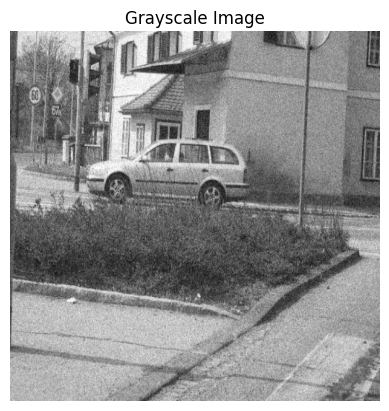

In [9]:
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

Adding Gaussian Noise

In [10]:
noise = np.random.normal(0, 25, gray.shape).astype(np.int16)
noisy = gray.astype(np.int16) + noise
noisy = np.clip(noisy, 0, 255).astype(np.uint8)


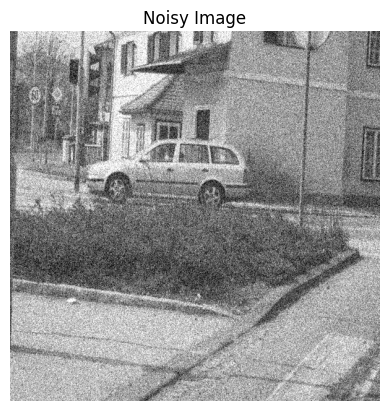

In [11]:

plt.imshow(noisy, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.show()

In [12]:
denoised = cv2.fastNlMeansDenoising(noisy, None, 30, 7, 21)
cv2.imwrite(f'{output_folder}/{filename}_denoised.jpg', denoised)


True

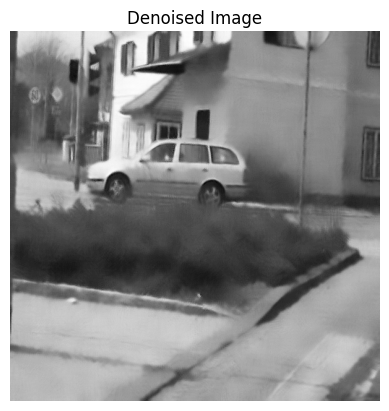

In [13]:
plt.imshow(denoised, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')
plt.show()

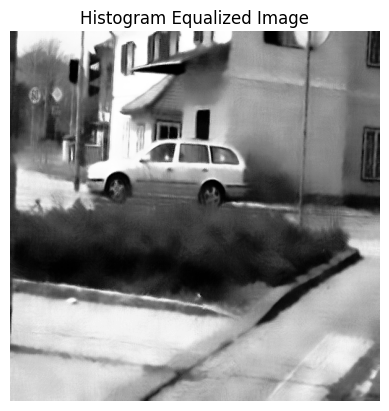

In [14]:
equalized = cv2.equalizeHist(denoised)
cv2.imwrite(f'{output_folder}/{filename}_equalized.jpg', equalized)

plt.imshow(equalized, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')
plt.show()

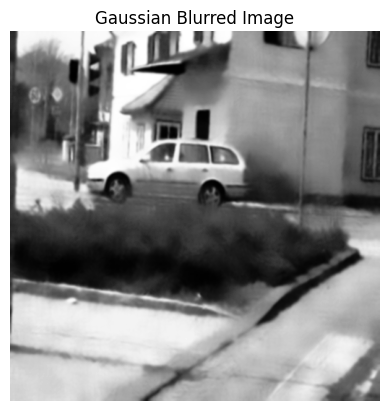

In [15]:
# Gaussian Blur
gaussian = cv2.GaussianBlur(equalized, (5, 5), 0)
cv2.imwrite(f'{output_folder}/{filename}_gaussian.jpg', gaussian)
plt.imshow(gaussian, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()

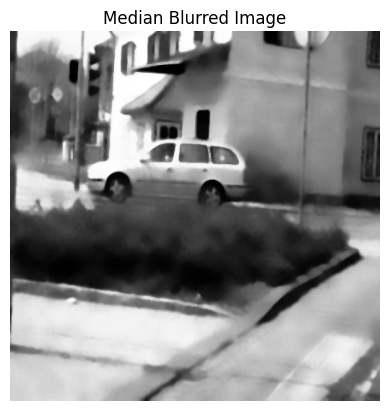

In [16]:
# Median Blur
median = cv2.medianBlur(equalized, 5)
cv2.imwrite(f'{output_folder}/{filename}_median.jpg', median)
plt.imshow(median, cmap='gray')
plt.title('Median Blurred Image')
plt.axis('off')
plt.show()

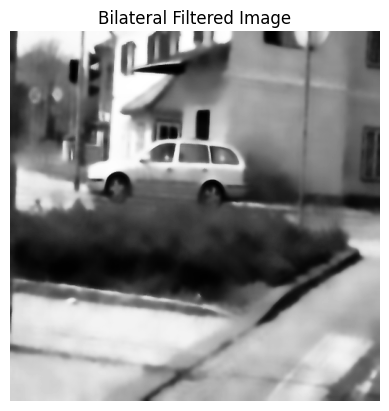

In [17]:
# Bilateral Filter
bilateral = cv2.bilateralFilter(equalized, 9, 75, 75)
cv2.imwrite(f'{output_folder}/{filename}_bilateral.jpg', bilateral)
plt.imshow(bilateral, cmap='gray')
plt.title('Bilateral Filtered Image')
plt.axis('off')
plt.show()

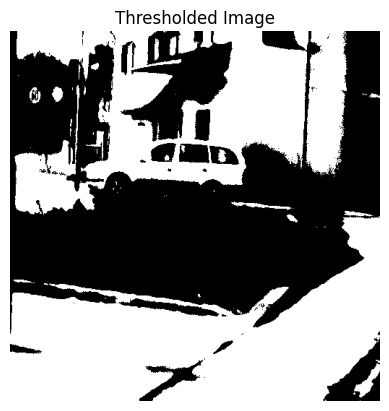

In [18]:
_, thresh = cv2.threshold(equalized, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite(f'{output_folder}/{filename}_threshold.jpg', thresh)

plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()


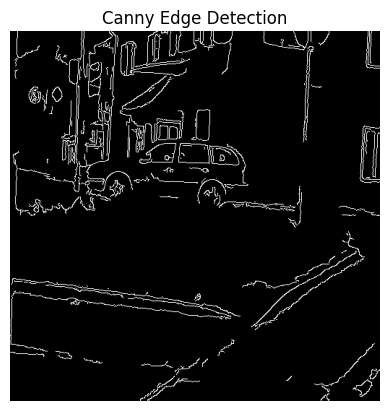

In [19]:
edges = cv2.Canny(equalized, 100, 200)
cv2.imwrite(f'{output_folder}/{filename}_edges.jpg', edges)

plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


 Morphological Operations
 

In [20]:
kernel = np.ones((5, 5), np.uint8)

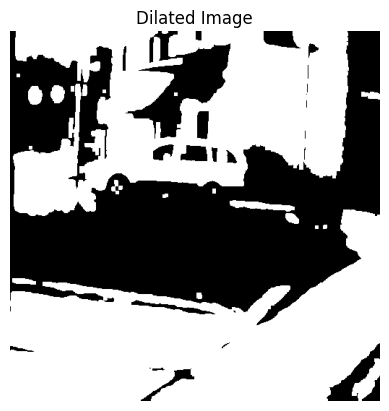

In [21]:
dilated = cv2.dilate(thresh, kernel, iterations=1)
cv2.imwrite(f'{output_folder}/{filename}_dilated.jpg', dilated)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')
plt.show()


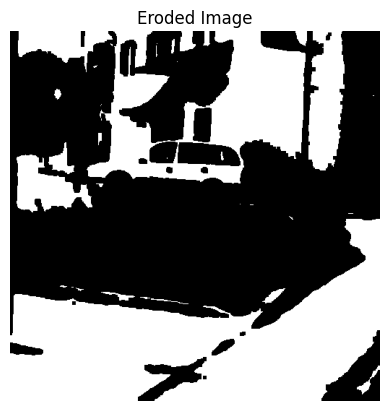

In [22]:
eroded = cv2.erode(thresh, kernel, iterations=1)
cv2.imwrite(f'{output_folder}/{filename}_eroded.jpg', eroded)
plt.imshow(eroded, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.show()